In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [96]:
with open("ttt.ANO", 'r') as f:
    s = f.read()
s

'********************************************************************************\n***                       Micro-Cap 11.2.0.3 (64 bit)                        ***\n***                                                                          ***\n***                                                                          ***\n***                            AC Analysis of ttt                            ***\n***                          4/18/2024 12:47:54 AM                           ***\n********************************************************************************\nLimits\n======\nFrequency Range          Linear 1,1E-3\nNumber of Points         1001\nTemperature              Linear 27\nMaximum Change %         5\nNoise Input              None\nNoise Output             2\nRun Options              Normal\nState Variables          Zero\nOperating Point          On\nAuto Scale Ranges        Off\nAccumulate Plots         Off\nIgnore Expression Errors Off\n\n\n****************************

In [97]:
wfs = """Waveform Values
===============
"""
sti = s.find(wfs) + len(wfs)
raw_data = s[sti:]
raw_data

'    re(v(13))   im(v(13))   re(v(19))   im(v(19))           F  abs(v(13))   ph(v(13))  abs(v(19))   ph(v(19))\n          (V)         (V)         (V)         (V)        (Hz)         (V)   (Degrees)         (V)   (Degrees)\n    2.767E-02  -1.385E+01   3.185E-02  -1.549E+01   1.000E-03   1.385E+01          NA   1.549E+01          NA\n    2.468E-02  -6.964E+00   3.116E-02  -7.765E+00   1.999E-03   6.964E+00  -8.980E+01   7.765E+00  -8.977E+01\n    1.973E-02  -4.682E+00   3.000E-02  -5.198E+00   2.998E-03   4.682E+00  -8.976E+01   5.198E+00  -8.967E+01\n    1.284E-02  -3.552E+00   2.836E-02  -3.919E+00   3.997E-03   3.552E+00  -8.979E+01   3.920E+00  -8.959E+01\n    4.050E-03  -2.882E+00   2.624E-02  -3.157E+00   4.996E-03   2.882E+00  -8.992E+01   3.157E+00  -8.952E+01\n   -6.573E-03  -2.443E+00   2.362E-02  -2.653E+00   5.995E-03   2.443E+00  -9.015E+01   2.653E+00  -8.949E+01\n   -1.897E-02  -2.134E+00   2.050E-02  -2.296E+00   6.994E-03   2.134E+00  -9.051E+01   2.296E+00  -8.949E+01\n

In [98]:
header, _, *parsed_data = tuple(tuple(filter(bool, line.strip().replace("NA", "0").split('  '))) for line in raw_data.strip().split('\n'))
header, parsed_data

(('re(v(13))',
  ' im(v(13))',
  ' re(v(19))',
  ' im(v(19))',
  ' F',
  'abs(v(13))',
  ' ph(v(13))',
  'abs(v(19))',
  ' ph(v(19))'),
 [('2.767E-02',
   '-1.385E+01',
   ' 3.185E-02',
   '-1.549E+01',
   ' 1.000E-03',
   ' 1.385E+01',
   '0',
   ' 1.549E+01',
   '0'),
  ('2.468E-02',
   '-6.964E+00',
   ' 3.116E-02',
   '-7.765E+00',
   ' 1.999E-03',
   ' 6.964E+00',
   '-8.980E+01',
   ' 7.765E+00',
   '-8.977E+01'),
  ('1.973E-02',
   '-4.682E+00',
   ' 3.000E-02',
   '-5.198E+00',
   ' 2.998E-03',
   ' 4.682E+00',
   '-8.976E+01',
   ' 5.198E+00',
   '-8.967E+01'),
  ('1.284E-02',
   '-3.552E+00',
   ' 2.836E-02',
   '-3.919E+00',
   ' 3.997E-03',
   ' 3.552E+00',
   '-8.979E+01',
   ' 3.920E+00',
   '-8.959E+01'),
  ('4.050E-03',
   '-2.882E+00',
   ' 2.624E-02',
   '-3.157E+00',
   ' 4.996E-03',
   ' 2.882E+00',
   '-8.992E+01',
   ' 3.157E+00',
   '-8.952E+01'),
  ('-6.573E-03',
   '-2.443E+00',
   ' 2.362E-02',
   '-2.653E+00',
   ' 5.995E-03',
   ' 2.443E+00',
   '-9.015E+01'

In [99]:
data = np.array(parsed_data, dtype=np.float32)
data.shape, data

((1001, 9),
 array([[ 2.767e-02, -1.385e+01,  3.185e-02, ...,  0.000e+00,  1.549e+01,
          0.000e+00],
        [ 2.468e-02, -6.964e+00,  3.116e-02, ..., -8.980e+01,  7.765e+00,
         -8.977e+01],
        [ 1.973e-02, -4.682e+00,  3.000e-02, ..., -8.976e+01,  5.198e+00,
         -8.967e+01],
        ...,
        [ 5.942e-07,  5.106e-06, -1.456e-05, ..., -1.357e+03,  4.591e-05,
         -1.332e+03],
        [ 6.712e-07,  5.066e-06, -1.377e-05, ..., -1.358e+03,  4.565e-05,
         -1.332e+03],
        [ 7.471e-07,  5.025e-06, -1.299e-05, ..., -1.358e+03,  4.539e-05,
         -1.333e+03]], dtype=float32))

In [100]:
pi_re, pi_im, pid_re, pid_im, *_ = data.T
pi_re, pi_im, pid_re, pid_im

(array([2.767e-02, 2.468e-02, 1.973e-02, ..., 5.942e-07, 6.712e-07,
        7.471e-07], dtype=float32),
 array([-1.385e+01, -6.964e+00, -4.682e+00, ...,  5.106e-06,  5.066e-06,
         5.025e-06], dtype=float32),
 array([ 3.185e-02,  3.116e-02,  3.000e-02, ..., -1.456e-05, -1.377e-05,
        -1.299e-05], dtype=float32),
 array([-1.549e+01, -7.765e+00, -5.198e+00, ...,  4.354e-05,  4.352e-05,
         4.349e-05], dtype=float32))

In [101]:
def get_closest_to_circle(x, y):
    points = np.vstack((x, y)).T
    idx = abs(np.linalg.norm(points, axis=1) - 1).argmin()
    return points[idx]

In [102]:
def get_closest_to_x(x, y):
    indexes = np.abs(y) < 0.1
    idx = x[indexes].argmin()
    points = np.vstack((x, y)).T[indexes]
    return points[idx]

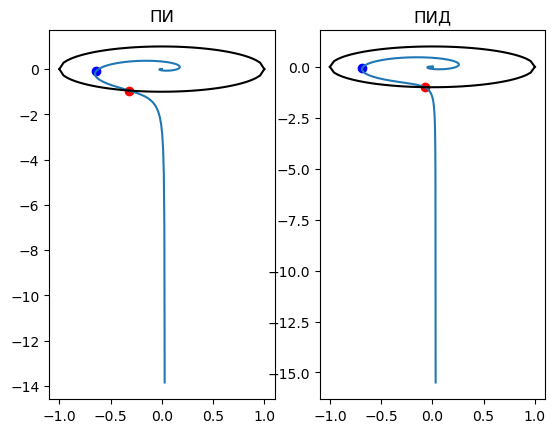

In [103]:
x = np.linspace(-1, 1)
circle = np.sqrt(1 - x**2)
pi_circle = get_closest_to_circle(pi_re, pi_im)
pi_alpha = get_closest_to_x(pi_re, pi_im)
pid_circle = get_closest_to_circle(pid_re, pid_im)
pid_alpha = get_closest_to_x(pid_re, pid_im)
plt.subplot(121)
plt.title("ПИ")
plt.plot(pi_re, pi_im)
plt.plot(x, circle, 'black')
plt.plot(x, -circle, 'black')
plt.scatter(*pi_circle, c="red")
plt.scatter(*pi_alpha, c="blue")
# plt.scatter(, c="red")
plt.subplot(122)
plt.title("ПИД")
plt.plot(pid_re, pid_im)
plt.plot(x, circle, 'black')
plt.plot(x, -circle, 'black')
plt.scatter(*pid_circle, c="red")
plt.scatter(*pid_alpha, c="blue")

In [104]:
pi_Ka = 20 * np.log10(1 / np.abs(pi_alpha[0]))
pid_Ka = 20 * np.log10(1 / np.abs(pid_alpha[0]))
pi_Ka, pid_Ka

(3.8438889986957476, 3.2760501827087296)

In [105]:
pi_dphi = np.degrees(np.arctan2(pi_circle[1], pi_circle[0]) + np.pi)
pid_dphi = np.degrees(np.arctan2(pid_circle[1], pid_circle[0]) + np.pi)
pi_dphi, pid_dphi

(71.38207661060432, 85.78313432460433)

In [106]:
# T = 0
# K = 1.18
# Ti = 12.8 / 2
# T = 1.2
# K = 0.88
# Ti = 16.2 / 2
T = 2.4
K = 0.79
Ti = 19.5 / 2

In [107]:
pickle.dump((
    (K, Ti, pi_Ka, pi_dphi),
    (K, Ti, pid_Ka, pid_dphi)
    ), open(f"ttt{T}.pickle", 'wb'))